Question 3 : What is the average pricing for a 3 bedroom/ 2 bathrooms home by selected state?
Coded by: Angela Gosewehr

In [21]:
#import
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [22]:
#Access the file and read it.
clean_states = Path('clean_states.csv') 
clean_states_df = pd.read_csv(clean_states)

clean_states_df.head()

,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
0,27821,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
1,27826,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
2,27828,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon
3,27829,174900.0,3.0,2.0,0.19,1280.0,Connecticut,Manchester
4,27830,289900.0,4.0,2.0,0.38,1617.0,Connecticut,East Windsor


In [23]:
# make dataframe that only includes price, bed room , bathroom, and state

limited_df = clean_states_df[['price', 'bed', 'bath','state']].copy().reset_index(drop=True)
limited_df

,price,bed,bath,state
0,579900.0,4.0,3.0,Connecticut
1,215000.0,2.0,1.0,Connecticut
2,144900.0,2.0,1.0,Connecticut
3,174900.0,3.0,2.0,Connecticut
4,289900.0,4.0,2.0,Connecticut
...,...,...,...,...
185883,475000.0,4.0,3.0,New Jersey
185884,350000.0,2.0,2.0,New Jersey
185885,241000.0,2.0,2.0,New Jersey
185886,629000.0,5.0,2.0,New Jersey


In [24]:
#filter that dataframe into only values that both equal 3 bedroom and 2 bathroom.
#Sam Espe helped with this equation
bed_and_bath_df=limited_df[(limited_df['bed']== 3.0) & (limited_df['bath']==2.0)]
print(bed_and_bath_df)

average_bedbath= bed_and_bath_df["price"].mean().round(2)
#print(average_bedbath)

           price  bed  bath        state
3       174900.0  3.0   2.0  Connecticut
8       299900.0  3.0   2.0  Connecticut
11      349900.0  3.0   2.0  Connecticut
14      279900.0  3.0   2.0  Connecticut
15      248900.0  3.0   2.0  Connecticut
...          ...  ...   ...          ...
185847  379900.0  3.0   2.0   New Jersey
185854  389000.0  3.0   2.0   New Jersey
185864  424900.0  3.0   2.0   New Jersey
185866  464999.0  3.0   2.0   New Jersey
185869  569000.0  3.0   2.0   New Jersey

[41899 rows x 4 columns]


In [25]:
# create a dataframe that only shows MASS
mass_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'Massachusetts']
mass_df

#find average
average_mass= mass_df["price"].mean()
average_mass=average_mass.round(2)
#print(average_mass)
#print(mass_df)

In [26]:
# create a dataframs that only shows CONN and price column
conn_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'Connecticut']
conn_df
#find average
average_conn= conn_df["price"].mean()
average_conn=average_conn.round(2)
#print(average_conn)
#print(conn_df)

In [27]:
#create a dataframe that only shows NEW JERSEY
nj_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'New Jersey']
nj_df
#find average
average_nj= nj_df["price"].mean()
average_nj=average_nj.round(2)
#print(average_nj)
#print(nj_df)

In [28]:
#create a dataframe that only shows NEW YORK 
ny_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'New York']
ny_df
#find average
average_ny= ny_df["price"].mean()
average_ny=average_ny.round(2)
#print(average_ny)
#print(ny_df)


In [29]:
#Do the average of the price column for MASS, CONN, NEW JERSEY, and NEW YORK
print ("The average New York house price is "+ str (average_ny) + "." )
print ("The average New Jersey house price is "+ str (average_nj) + "." )
print ("The average Massachusetts house price is "+ str (average_mass) + "." )
print ("The average Connectitcut house price is "+ str (average_conn) + "." )
print ("The average house price for all the states together is "+ str (average_bedbath) + "." )


The average New York house price is 642090.63.
The average New Jersey house price is 350872.38.
The average Massachusetts house price is 546770.77.
The average Connectitcut house price is 287699.46.
The average house price for all the states together is 419604.88.


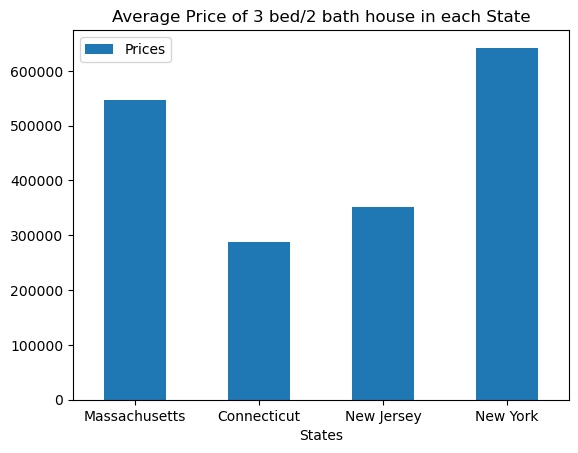

In [30]:
#Make a bar graph with the average for each state
bar_plot_df = pd.DataFrame({'States':['Massachusetts', 'Connecticut', 'New Jersey','New York'], 'Prices':[average_mass, average_conn, average_nj,average_ny,]})
ax = bar_plot_df.plot.bar(x='States', y='Prices', title= 'Average Price of 3 bed/2 bath house in each State', rot=0)

In [31]:
price_state_ny_df = ny_df[['price','state']].copy()
#price_state_ny_df


In [32]:
price_state_df = bed_and_bath_df[['price','state']].copy()
#price_state_df 

In [33]:
#create a dataframe that puts the states as headers with the coordinating prices under them
next_df= price_state_df.set_index([price_state_df.groupby('state')['state'].cumcount(), 'state'])['price'].unstack()
next_df

state,Connecticut,Massachusetts,New Jersey,New York
0,174900.0,289900.0,305100.0,125000.0
1,299900.0,384900.0,350000.0,61900.0
2,349900.0,275000.0,449000.0,92500.0
3,279900.0,390000.0,525000.0,245000.0
4,248900.0,439900.0,335000.0,245000.0
...,...,...,...,...
15176,NaN,560000.0,NaN,NaN
15177,NaN,495000.0,NaN,NaN
15178,NaN,345000.0,NaN,NaN
15179,NaN,357000.0,NaN,NaN


Text(0, 0.5, 'Frequency')

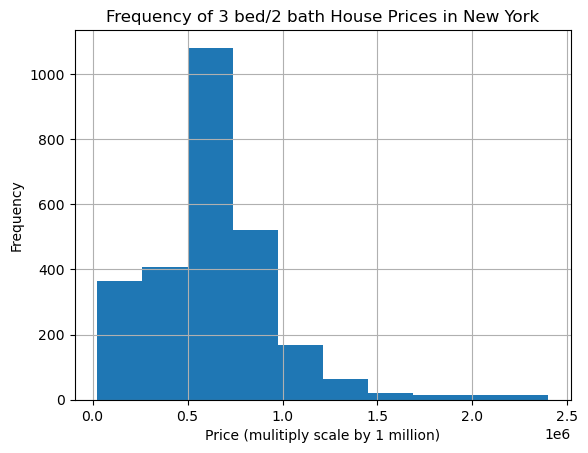

In [34]:
#NY Histogram
ny_df.hist(column='price')
plt.title("Frequency of 3 bed/2 bath House Prices in New York")
plt.xlabel("Price (mulitiply scale by 1 million)")
plt.ylabel("Frequency")


In [35]:
price_state_nj_df = nj_df[['price','state']].copy()
#price_state_nj_df


Text(0, 0.5, 'Frequency')

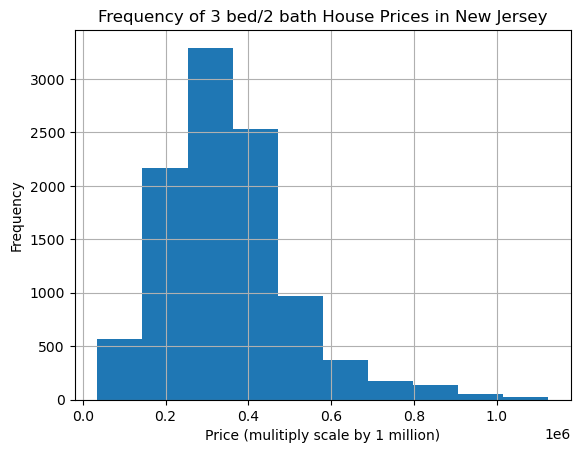

In [36]:
#NJ Histogram
price_state_nj_df.hist(column='price')
plt.title("Frequency of 3 bed/2 bath House Prices in New Jersey")
plt.xlabel("Price (mulitiply scale by 1 million)")
plt.ylabel("Frequency")


In [37]:
price_state_conn_df = conn_df[['price','state']].copy()
#price_state_conn_df

Text(0, 0.5, 'Frequency')

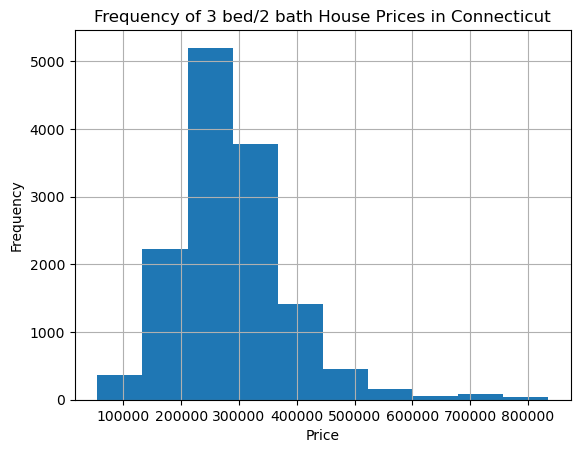

In [38]:
#Conn Histogram
price_state_conn_df.hist(column='price')
plt.title("Frequency of 3 bed/2 bath House Prices in Connecticut")
plt.xlabel("Price")
plt.ylabel("Frequency")

In [39]:
price_state_mass_df = mass_df[['price','state']].copy()

#price_state_mass_df

Text(0, 0.5, 'Frequency')

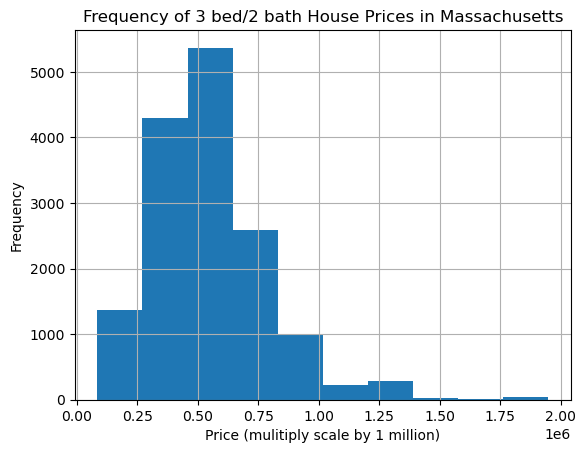

In [40]:
#Mass Histogram
mass_df.hist(column='price')
plt.title("Frequency of 3 bed/2 bath House Prices in Massachusetts")
plt.xlabel("Price (mulitiply scale by 1 million)")
plt.ylabel("Frequency")
